# Nickolas4 - Monte Carlo Simulation 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as dr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [2]:
#Generate portfolio
symbols = ['AAPL', 'MSFT', 'TLT', 'USO', 'GLD', 
           'SPY', 'CAT', 'KO', 'WMT', 'EMB']
asset_count = len(symbols)

In [5]:
#Empty DF to store web data
nickolas4 = pd.DataFrame()

In [3]:
risk_free = dr('^IRX', data_source='yahoo', 
                       start='2010-01-01')['Adj Close']/100
risk_free.tail()

Date
2017-04-24    0.00770
2017-04-25    0.00808
2017-04-26    0.00803
2017-04-27    0.00785
2017-04-28    0.00780
Name: Adj Close, dtype: float64

In [6]:
#Add 10 historic asset returns from Yahoo
for i in symbols:
    nickolas4[i] = dr(i, data_source='yahoo', 
    start='2010-01-01')['Adj Close'].round(2)
nickolas4.columns = symbols

nickolas4.tail()

,AAPL,MSFT,TLT,USO,GLD,SPY,CAT,KO,WMT,EMB
Date,,,,,,,,,,
2017-04-24,143.64,67.53,122.93,10.25,121.48,237.17,96.81,43.28,74.78,114.89
2017-04-25,144.53,67.92,121.45,10.36,120.25,238.55,104.42,43.11,75.05,114.60
2017-04-26,143.68,67.83,122.12,10.26,120.84,238.40,104.66,43.24,75.43,114.58
2017-04-27,143.79,68.27,122.08,10.24,120.39,238.60,102.68,43.01,75.44,114.84
2017-04-28,143.65,68.46,122.35,10.24,120.77,238.08,102.26,43.15,75.18,115.20


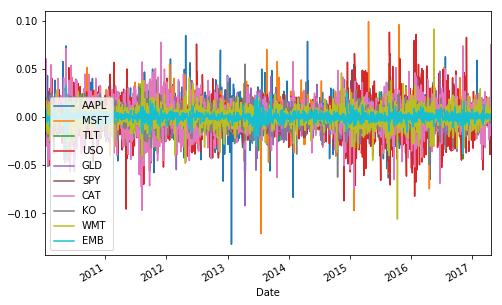

In [7]:
#DF of Logarithim Returns
n4_log = np.log(nickolas4/nickolas4.shift(1))
n4_log.plot(figsize=(8,5))

# 2.) Monte Carlo Simulation 

* Generate vectors of random portfolio weights on a larger scale. 


* For every simulated allocation, we record the resulting portflio return and variance. 


* Of paramount interest to investors is the risk-return profiles that are possible for a given set of securities and their statistical characteristics.

In [8]:
#Iterations
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(asset_count)
    weights /= np.sum(weights)
    prets.append(np.sum(n4_log.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(n4_log.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

* Illustrate the resulting values from the Monte Carlo Simulation

* Show the sharpe ratio (assume Risk-Free = 0)

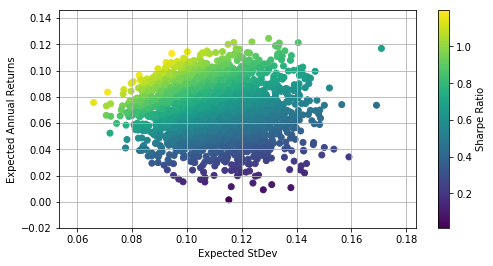

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c = prets/pvols, marker = 'o')
plt.grid(True)
plt.xlabel("Expected StDev")
plt.ylabel('Expected Annual Returns')
plt.colorbar(label = 'Sharpe Ratio')

* It is clear by inspection from the above graph that not all weight distributions perform well when measured in terms of mean and variance. 

* For example, for a fixed level of risk, say 20%, there are multiple portfolios with distinct returns. As as investor one is generally interested in the maximum retrun given a fixed level of risk or the minimum risk given a return expectation.... (Known as the efficient frontier)